# Homework #2

In [1]:
!wget https://drive.google.com/uc?id=1o0UMPTyUFzX9CaQp-BwYXgkCho1Zo6yL  -O kitty55.png
!wget https://drive.google.com/uc?id=1_-_yN30miNhzR9ZC5DHTiljH6LVq4hZz  -O clean_cat.png
!wget https://drive.google.com/uc?id=1LEwFRI2vjSqQEd68lYwyuJ4JyJYPQX2m  -O blurry_noisy_cat.png
!wget https://drive.google.com/uc?id=1lnO_PK81O54bLBUprBlo8-2x9smWYDcP  -O moodeng.jpg

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
# homework2_1 --> do not modify/delete this first line and do not add anything before this line

# import library for 2.1
import cv2
import numpy as np
import matplotlib.pyplot as plt
# you can add more library here


def homework2_1(gray_image):
    # input -> gray_image - type -> np.ndarray, size of - (height, width) with dtype - uint8
    # output -> filtered_image - Filtered images (P_T > 99%) - type -> np.ndarray, size of - (height, width) with dtype - uint8


    # TO DO : Apply a Gaussian low pass filter with minimum cutoff frequency (C) maintaining the image power > 99%
    image_fft2 = np.fft.fft2(gray_image)
    shift_image_fft2 = np.fft.fftshift(image_fft2)
    D0 = 27
    H = image_fft2.copy() * 0
    centerr = image_fft2.shape[0] // 2
    centerc = image_fft2.shape[1] // 2
    for i in range(H.shape[0]) :
        for j in range(H.shape[1]) :
            H[i][j] = np.exp(-((centerr - i)**2 + (centerc - j)**2)/2/D0/D0)
    filtered_shift_image_fft2 = shift_image_fft2 * H
    filteted_image_fft2 = np.fft.ifftshift(filtered_shift_image_fft2)
    filtered_image = np.fft.ifft2(filteted_image_fft2)

    ori_power = np.abs(image_fft2)**2
    filtered_power = np.abs(filteted_image_fft2)**2

    percentage = 100 * np.sum(filtered_power) / np.sum(ori_power)
    print("Percentage :",percentage)

    # put log here to enchance the visibility.
    plt.title("Original Fourier shift spectrum")
    plt.imshow(np.log(1 + np.abs(shift_image_fft2)),cmap='gray')
    plt.show()

    plt.title("Filted Fourier shift spectrum")
    plt.imshow(np.log(1 + np.abs(filtered_shift_image_fft2)),cmap='gray')
    plt.show()

    return np.real(filtered_image)



# Do not add anything outside the function in the submission

In [3]:
# homework2_2 --> do not modify/delete this first line and do not add anything before this line
# import library for 2.2
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim


def homework2_2(org_image,blur_image):
    # input -> org_image - a grayscale image with type -> np.ndarray, size of - (height, width) with dtype - uint8
    #       -> blur_image - a degraded image with type -> np.ndarray, size of - (height, width) with dtype - uint8
    # output -> restored_image - restored image (grayscale) using wiener filter - type -> np.ndarray, size of - (height, width) with dtype - uint8
    #         -> SSIM - compared image

    # TO DO - Restore an image using wiener filter
    # get gassain filter
    gaussian_n = 8
    gaussian_d = 1.6
    ax = np.linspace(-(gaussian_n // 2), gaussian_n // 2, gaussian_n)
    x, y = np.meshgrid(ax, ax)
    k = np.exp(-0.5 * (np.square(x) + np.square(y)) / np.square(gaussian_d))
    H = k / np.sum(k)
    K = 0.01

    # get fft of blur image and the fitler
    blur_image_fft = np.fft.fft2(blur_image)
    H_pad = blur_image_fft * 0
    H_pad[:gaussian_n,:gaussian_n] = H
    # shift the filter to set the center to (0,0)
    H_pad = np.roll(H_pad, -4, axis=0)
    for i in range(H_pad.shape[0]) :
        H_pad[i,:] = np.roll(H_pad[i,:], -4, axis=0)
    H_pad_fft = np.fft.fft2(H_pad)
    
    
    # minimum mean squre wiener filtering
    restored_image = np.real(np.fft.ifft2(blur_image_fft*np.conjugate(H_pad_fft)/(np.abs(H_pad_fft)**2 + K)))
    restored_image[restored_image<0]  = 0
    restored_image[restored_image> 255] = 255

    # Get ssim
    SSIM = ssim(org_image,restored_image, data_range = restored_image.max() - restored_image.min())

    return restored_image, SSIM



# Do not add anything outside the function in the submission

In [4]:
!pip install PyWavelets

   ---------------------------------------- 0.0/4.3 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.3 MB ? eta -:--:--
   --------- ------------------------------ 1.0/4.3 MB 2.8 MB/s eta 0:00:02
   ----------------- ---------------------- 1.8/4.3 MB 3.1 MB/s eta 0:00:01
   ---------------------- ----------------- 2.4/4.3 MB 3.4 MB/s eta 0:00:01
   --------------------------- ------------ 2.9/4.3 MB 2.9 MB/s eta 0:00:01
   --------------------------- ------------ 2.9/4.3 MB 2.9 MB/s eta 0:00:01
   -------------------------------- ------- 3.4/4.3 MB 2.4 MB/s eta 0:00:01
   ---------------------------------- ----- 3.7/4.3 MB 2.2 MB/s eta 0:00:01
   ------------------------------------ --- 3.9/4.3 MB 2.1 MB/s eta 0:00:01
   ------------------------------------ --- 3.9/4.3 MB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 4.3/4.3 MB 2.0 MB/s eta 0:00:00


In [5]:
# homework2_3 --> do not modify/delete this first line and do not add anything before this line
# import library for 2.3
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt
# you can add more library here



def homework2_3(rgb_image):
  # input -> rgb_image - type -> np.ndarray, size of - (height, width,3) with dtype - uint8
  # output -> blur_image - half blur image in Grayscale or RGB colors



  # TO DO : generate and return the right half blur image using Wavelet
  h = (rgb_image.shape[0] + 1) // 2
  w = (rgb_image.shape[1] + 1) // 2
  LL = np.zeros((h,w,3))
  LH = np.zeros((h,w,3))
  HL = np.zeros((h,w,3))
  HH = np.zeros((h,w,3))
  LL[:,:,0], (LH[:,:,0], HL[:,:,0], HH[:,:,0]) = pywt.dwt2(rgb_image[:,:,0], 'haar')
  LL[:,:,1], (LH[:,:,1], HL[:,:,1], HH[:,:,1]) = pywt.dwt2(rgb_image[:,:,1], 'haar')
  LL[:,:,2], (LH[:,:,2], HL[:,:,2], HH[:,:,2]) = pywt.dwt2(rgb_image[:,:,2], 'haar')


  # output the result(Note we add 128 bias to the image toenhance visibility)

  # LL = np.clip(LL, 0, 255).astype(np.uint8)
  # LH = np.clip(LH + 128, 0, 255).astype(np.uint8)
  # HL = np.clip(HL + 128, 0, 255).astype(np.uint8)
  # HH = np.clip(HH + 128, 0, 255).astype(np.uint8)
  # plt.title('Horizontal detail')
  # plt.axis(False)
  # plt.imshow(LH)
  # plt.show()

  # plt.title('Vertical Detail')
  # plt.axis(False)
  # plt.imshow(HL)
  # plt.show()

  # plt.title('Diagonal Detail')
  # plt.axis(False)
  # plt.imshow(HH)
  # plt.show()

  centerr = w // 2
  LH[:,centerr:,:] = 0
  HL[:,centerr:,:] = 0
  HH[:,centerr:,:] = 0

  restored_image = np.zeros((h * 2,w * 2,3))
  restored_image[:,:,0] = pywt.idwt2((LL[:,:,0], (LH[:,:,0], HL[:,:,0], HH[:,:,0])), 'haar')
  restored_image[:,:,1] = pywt.idwt2((LL[:,:,1], (LH[:,:,1], HL[:,:,1], HH[:,:,1])), 'haar')
  restored_image[:,:,2] = pywt.idwt2((LL[:,:,2], (LH[:,:,2], HL[:,:,2], HH[:,:,2])), 'haar')
  restored_image = np.clip(restored_image,0,255).astype(np.uint8)

  return restored_image

# Do not add anything outside the function in the submission

# Test our function here

In [6]:
# test homework2_1
img = cv2.imread('kitty55.png',0)
out = homework2_1(img)
plt.imshow(out,cmap='gray')
plt.show()


IndexError: cannot do a non-empty take from an empty axes.

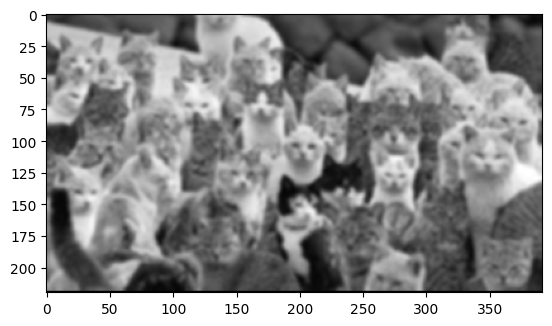

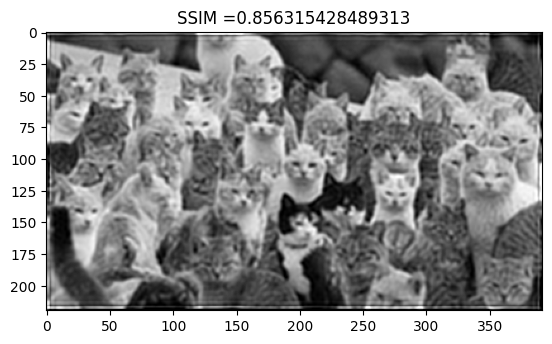

In [106]:
# test homework2_2
org_image = cv2.imread("clean_cat.png",0)
blur_image = cv2.imread("blurry_noisy_cat.png",0)
restored_image, SSIM = homework2_2(org_image,blur_image)
plt.imshow(blur_image,cmap='gray')
plt.show()
plt.imshow(restored_image,cmap='gray')
plt.title('SSIM ='+ str(SSIM))
plt.show()

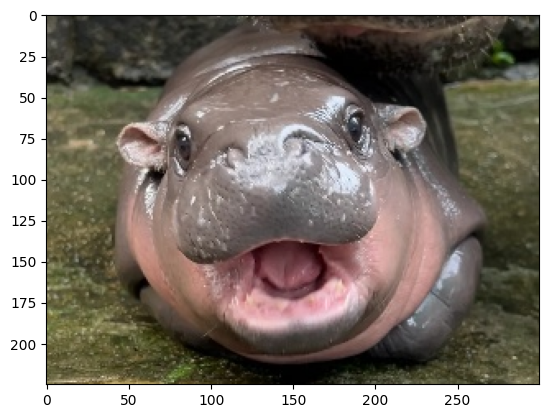

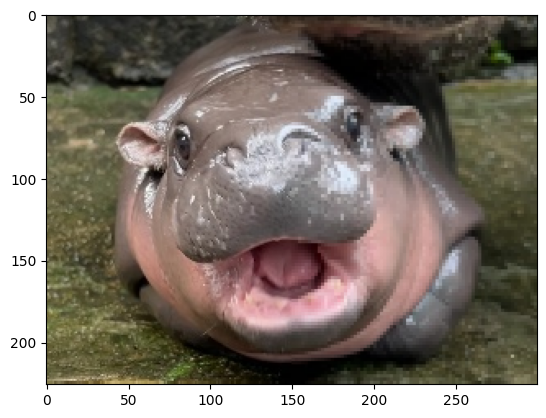

In [107]:
# test homework2_3
rgb = cv2.imread("moodeng.jpg")
blur_image = homework2_3(rgb[:,:,::-1])
plt.imshow(rgb[:,:,::-1])
plt.show()
plt.imshow(blur_image,cmap='gray')
plt.show()